# Análise exploratória de dados

In [194]:
pip list | grep matplotlib

matplotlib                3.5.1
matplotlib-inline         0.1.3
Note: you may need to restart the kernel to use updated packages.


In [195]:
pip install "numpy<2.0"

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [196]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [197]:
from IPython.display import display, Markdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#e188ff", "#8bead7"] 
# verde e ciano, nessa ordem.
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

In [198]:
#importando conjunto de dados:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. Descrição dos Dados


O conjunto de dados Titanic relaciona as informações dos passageiros a bordo do famoso navio, naufragado em 1909. A observação desse dataset permite identificar padrões ao analisar quais fatores mais impactaram as taxas de sobrevivência, levando a insights sobre segurança em embarcações como essa.  

Variáveis: 15 variáveis sendo 10 qualitativas e 5 quantitativas.


In [199]:
# Dicionários de Dados:
dicionario = pd.DataFrame  ( [
    
    {
        "variavel": "survived",
        "descrição": "Se a pessoa sobreviveu ou não",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "pclass",
        "descrição": "CLasse da passagem (1,2,3)",
        "tipo": "qualitativo",
        "subtipo": "ordinal",
    }, {
        "variavel": "sex",
        "descrição": "Gênero do passageiro",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "age",
        "descrição": "Idade do passageiro",
        "tipo": "quantitativo",
        "subtipo": "contínua",
    }, {
        "variavel": "sibsp",
        "descrição": "Se o passageiro possui irmãos/cônjuges a bordo",
        "tipo": "quantitativo",
        "subtipo": "discreto",
    }, {
        "variavel": "parch",
        "descrição": "Se o passageiro possui pais/filhos a bordo",
        "tipo": "quantitativo",
        "subtipo": "discreto",
    }, {
        "variavel": "fare",
        "descrição": "Valor da passagem",
        "tipo": "quantitativo",
        "subtipo": "contínuo",
    }, {
        "variavel": "embarked",
        "descrição": "Porto de embarque (C, Q, S)",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "class",
        "descrição": "Classe do passageiro (1,2,3)",
        "tipo": "qualitativo",
        "subtipo": "ordinal",
    }, {
        "variavel": "who",
        "descrição": "Perfil do passageiro",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "adult_male",
        "descrição": "Se é um homem adulto",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "deck",
        "descrição": "Qual cabine o passageiro está hospedado(A,B,C,D,E,F,G)",
        "tipo": "qualitativo",
        "subtipo": "ordinal",
    }, {
        "variavel": "embark_town",
        "descrição": "Cidade de embarque",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "alive",
        "descrição": "Se a pessoa sobreviveu ou não",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    }, {
        "variavel": "alone",
        "descrição": "Se a pessoa está só ou não",
        "tipo": "qualitativo",
        "subtipo": "nominal",
    } 


] )

In [200]:
dicionario.to_csv("../data/external/dictionary.csv", index=False)

In [201]:
dicionario

,variavel,descrição,tipo,subtipo
0,survived,Se a pessoa sobreviveu ou não,qualitativo,nominal
1,pclass,"CLasse da passagem (1,2,3)",qualitativo,ordinal
2,sex,Gênero do passageiro,qualitativo,nominal
3,age,Idade do passageiro,quantitativo,contínua
4,sibsp,Se o passageiro possui irmãos/cônjuges a bordo,quantitativo,discreto
5,parch,Se o passageiro possui pais/filhos a bordo,quantitativo,discreto
6,fare,Valor da passagem,quantitativo,contínuo
7,embarked,"Porto de embarque (C, Q, S)",qualitativo,nominal
8,class,"Classe do passageiro (1,2,3)",qualitativo,ordinal
9,who,Perfil do passageiro,qualitativo,nominal


In [202]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Em 891 linhas, temos:

Valores faltantes: 688 em 'deck' e 177 em 'age'.

Das 5 variáveis quantitativas 3 são discretas e 2 nominal.
Das 10 variáves qualitativas 8 são nominais e 2 ordinais.

## 2. Perguntas de partida e hipóteses

Inicialmente, ao observar o Data Set podemos levantar algumas perguntas de partida como:

- Existem dados faltantes? Se sim, quais?
- Qual a distribuição dos dados?
- Qual a passagem mais cara? E a mais barata?
- Existe uma relação entre a classe da passagem e a sobrevivência dos passsageiros?
- Qual cidade pagou mais barato no ticket de viagem?
- Quais fatores influenciaram o valor da passagem?



Levantando hipóteses para essas pergunts, como:

- A passagem mais cara é aquela para a primeira classe que sai do porto mais distante.
- Em tragédias como essa percebemos a influência da desigualdade social, especialmente nessa época. Espera-se então que os passageiros em melhor classe tenham maior chance de sobrevivência. Outro fator influente é o aspecto cultural do século XIX de priorizar o resgate de mulheres e crianças.
- A última da rota e mais próxima do destino final da embarcação.
- Supõe-se que fatores como: "Deck", "passenger class", "age", "embarked town" e "class" influenciem nesse valor.

### Dados faltantes

In [204]:
number_b = df.isnull().sum().loc[lambda x: x > 0]
number_c = df.isnull().any(axis=1).sum()

display(number_b)
display(Markdown(
))

df.dropna(inplace=True)
df.describe()

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

<IPython.core.display.Markdown object>

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Assim podemos obervar que temos um total de 869 dados faltantes, principalmente na variável "deck", tornando pouco precisas as análises em volta desse parêmetro. Outras variáveis que sofrem com a presença de dados faltantes são: "age", "embarked" e "embarked town".

### Visão Geral

In [205]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


Algumas conclusões podem ser tiradas:

- Existem 7 classificações para "deck" e o deck "C" é o mais comum.
- Existem 3 portos de embarcação e 3 possíveis tipos de passagem.
- A variável "age" não é um parâmetro confiável para análise, tendo em vista a grande quantidade de dados faltantes.
- A cidade onde mais embarcaram passageiros foi "Southampton".
- A média de passagem foi $78.9197. 
- A passagem mais cara foi 512,329200 enquanto a mais barata foi de graça.
- A maior parte dos passageiros estava na primeira classe. 
- A maior parte dos tripulante sobreviveram, 123.

#### Informações extras:

In [206]:
adult_man = df["adult_male"].value_counts()
adult_man

adult_male
False    95
True     87
Name: count, dtype: int64

In [207]:
pass_class = df["pclass"].value_counts()
pass_class

pclass
1    157
2     15
3     10
Name: count, dtype: int64

In [208]:
survival = df["survived"].value_counts()
survival

survived
1    123
0     59
Name: count, dtype: int64

- Tinham 182 passageiros
- 123 passageiros sobreviveram = 67,58% de sobrevivência
- 87 dos passageiros eram homens adultos, representando 47,81% da amostra

### Tipo da passagem

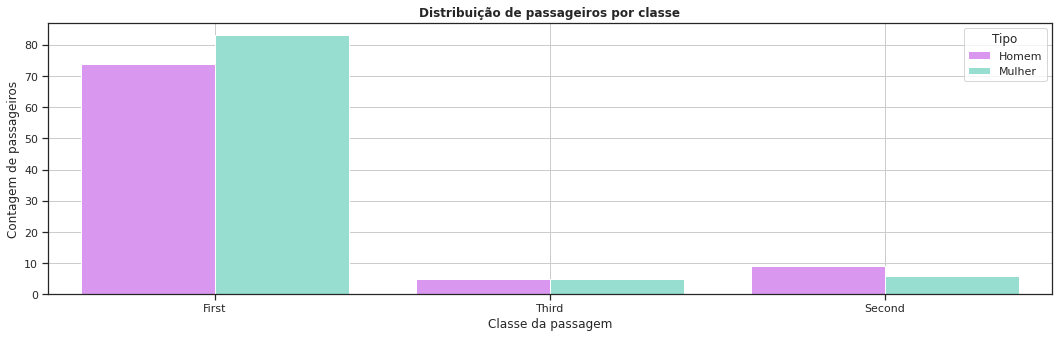

In [213]:
# Distribuição por tipo da passagem
plt.figure(figsize=(18,5))
sns.countplot(x='class', hue='sex', data=df)
plt.xlabel('Classe da passagem')
plt.ylabel('Contagem de passageiros')
plt.title('Distribuição de passageiros por classe', fontweight='bold')
plt.legend(title='Tipo', labels=['Homem','Mulher','Criança'])
plt.grid()

plt.show()

#### Influência da cidade de embarque no valor do ticket

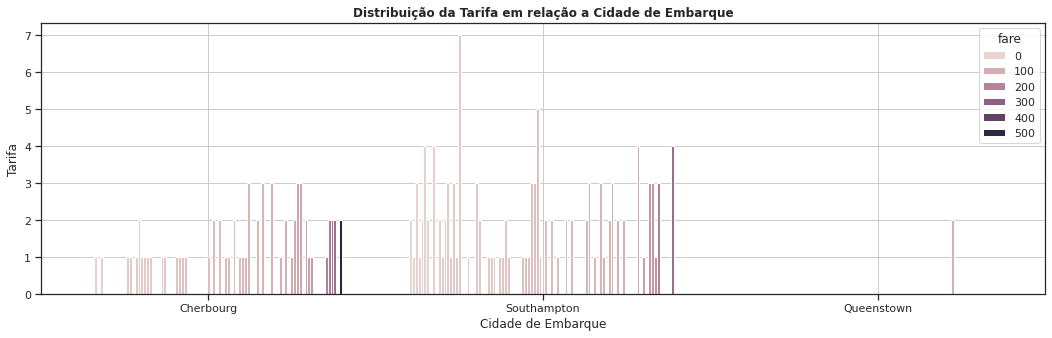

In [214]:
# Relação entre embark_town e fare
plt.figure(figsize=(18,5))
sns.countplot(x='embark_town', hue='fare', data=df)
plt.xlabel('Cidade de Embarque')
plt.ylabel('Tarifa')
plt.title('Distribuição da Tarifa em relação a Cidade de Embarque', fontweight='bold')
plt.grid()

plt.show()

- Os tripulantes de Cherbourg pagaram as tarifas mais altas, indicando que muitos passageiros dessa cidade estavam nas classes elevadas.
- Poucos passageiros embarcaram em Queenstown, dificultando análises complexas relacionando essa cidade.
- A média das passagens de Southampton foi mais barata.


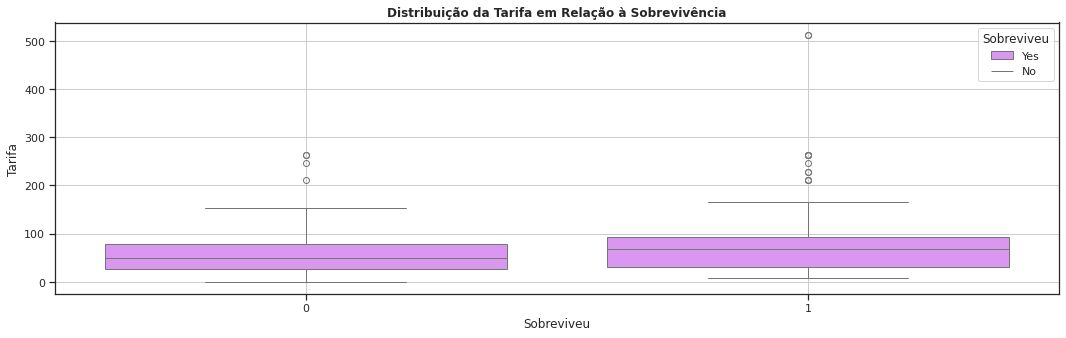

In [216]:
# Relação entre valor da passagem e sobrevivência

plt.figure(figsize=(18,5))
sns.boxplot(x='survived', y='fare', data=df)
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa')
plt.legend(title='Sobreviveu', labels=['Yes','No'])
plt.title('Distribuição da Tarifa em Relação à Sobrevivência', fontweight='bold')
plt.grid()

plt.show()

- A mediana do valor da tarifa dos passageiros que sobreviveram foi mais alta, confirmando que a taxa de embarque e a classe da passagem influenciaram favoravelmente a sobrevivência.
- Mesmo passageiros que pagaram valores elevados também foram vítimas da tragédia.

### Fatores que afetaram a taxa de sobrevivência

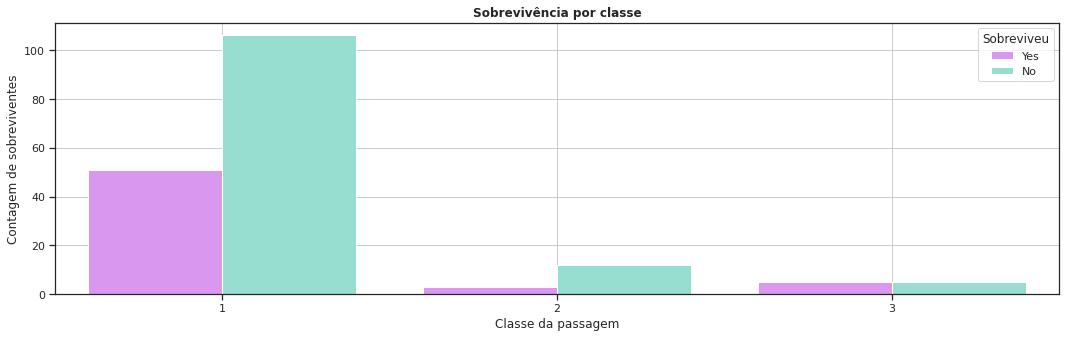

In [217]:
# Distribuição por tipo da passagem
plt.figure(figsize=(18,5))
sns.countplot(x='pclass', hue='survived', data=df)
plt.xlabel('Classe da passagem')
plt.ylabel('Contagem de sobreviventes')
plt.title('Sobrevivência por classe', fontweight='bold')
plt.legend(title='Sobreviveu', labels=['Yes','No'])
plt.grid()

plt.show()

- Observamos então que os passageiros da primeira classe tiveram a maior taxa de sobrevivência.

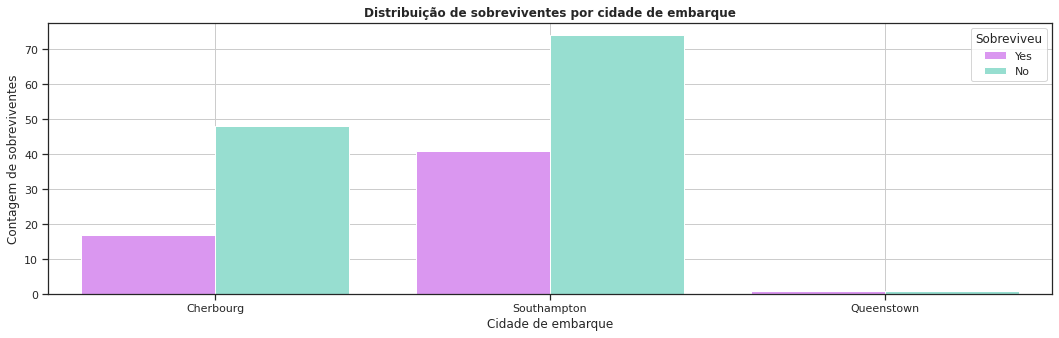

In [218]:
# Contagem de passageiros por cidade de embarque

plt.figure(figsize=(18,5))
sns.countplot(x='embark_town', hue='survived', data=df)
plt.xlabel('Cidade de embarque')
plt.ylabel('Contagem de sobreviventes')
plt.legend(title='Sobreviveu', labels=['Yes','No'])
plt.title('Distribuição de sobreviventes por cidade de embarque', fontweight='bold')
plt.grid()

plt.show()

- A grande maioria dos passageiros ingressaram em Southampton.
- Esse distribuição do grupo amostral é refletido na quantidade de sobreviventes.
- Sendo os tripulantes de Cheerbourg das classes mais elevadas, essas pessoas tiveram a maior taxa de sobrevivência.

## 3. Insights

- Já que existem muitos dados faltantes em relação a 'age' e 'deck', hipóteses se baseando nesses parâmetros se tornam pouco eficazes.

- Ao analisarmos os dados no DataFrame podemos perceber uma relação entre o preço da passagem ('fare'), classe do passageiro e cidade de origem. 

- Os passageiros das classes mais altas tiveram maiores taxas de sobrevivência

- A maior parte dos tripulantes foi a óbito.